In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import matplotlib
import umap

from eden import graph

import warnings
warnings.filterwarnings("ignore")

In [5]:
import load_data as ld

In [6]:
graphs,labels = ld.load_data("MUTAG")

In [13]:
for g in graphs:
    for node in g.nodes():
        g.nodes[node]['vec'] = []
for g in graphs:
    for edge in g.edges():
        g.edges[edge]['vec'] = []

In [14]:
# Vectorize 
emb_vec = graph.vectorize(graphs,nbits=16)

emb_vec_A = emb_vec.A
emb_vec = []
for i in emb_vec_A:
    emb_vec.append(i)

# Split TRAIN TEST

In [15]:
data_train,data_test, label_train,label_test = train_test_split(emb_vec, labels, test_size = 0.2)

### NON DETERMINISTIC

In [16]:
uma = umap.UMAP(n_components=2, random_state=10)
uma = uma.fit(data_train,label_train)

non DETERMINISTIC


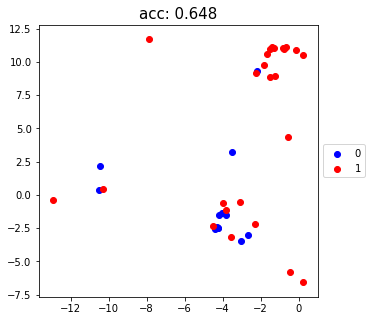

In [17]:
print("non DETERMINISTIC")
res_2d = uma.transform(data_test)
plot_embedding(label_test,res_2d)

### DETERMINISTIC

In [18]:
def deterministic_transform_ump(uma,data):
    res = []
    for i in data:
        emb = uma.transform([i])[0]
        res.append([emb[0],emb[1]])
    return(res)

In [30]:
uma = umap.UMAP(n_components=2, random_state=10)
uma = uma.fit(data_train,label_train)

DETERMINISTIC


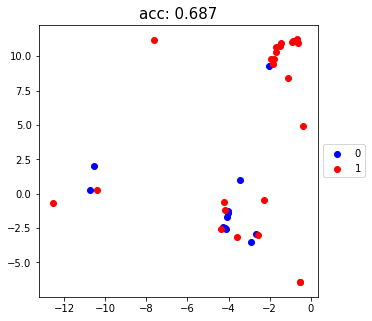

In [31]:
print("DETERMINISTIC")
res_2d = deterministic_transform_ump(uma,data_test)
plot_embedding(label_test,res_2d)

# RANDOM FROEST CLASSIFIER

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# tranform with umap
uma = umap.UMAP(n_components=2, random_state=10)
res_uma_train = uma.fit(data_train,label_train).transform(data_train)

# discretize
res_uma_train = res_uma_train * 1000
res_uma_train = res_uma_train.astype(int)

# fit Random Forest
clf = RandomForestClassifier(n_estimators=1000,criterion = 'entropy',random_state=10)
clf = clf.fit(data_train,res_uma_train)

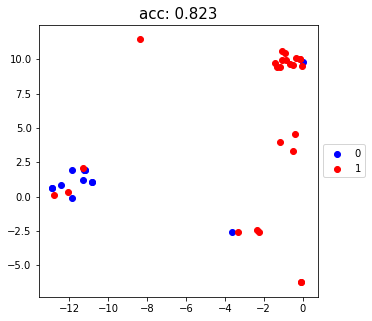

In [62]:
# predict and plot
res_RF = clf.predict(data_test)
res_RF = res_RF/1000
plot_embedding(label_test,res_RF)

# RANDOM FROEST REGRESSION
### multiple output

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
# tranform with umap
uma = umap.UMAP(n_components=2, random_state=10)
res_uma_train = uma.fit(data_train,label_train).transform(data_train)


# fit random forest regression
regr_rf = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=2)
regr_rf = regr_rf.fit(data_train,res_uma_train)

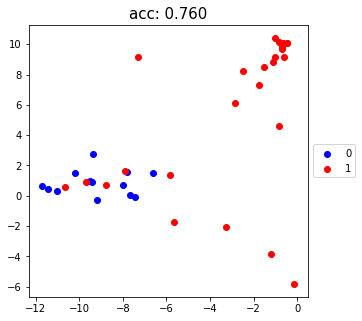

In [86]:
# predict and plot
res_regr_rf = regr_rf.predict(data_test)
plot_embedding(label_test,res_regr_rf)

# RANDOM FROEST REGRESSION
### multiple single output

In [87]:
# tranform with umap
uma = umap.UMAP(n_components=2, random_state=10)
res_uma_train = uma.fit(data_train,label_train).transform(data_train)


# fit random forest regression
# feature 0
regr_rf_0 = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=2)
regr_rf_0 = regr_rf_0.fit(data_train,res_uma_train[:,0])
# feature 1
regr_rf_1 = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=2)
regr_rf_1 = regr_rf_1.fit(data_train,res_uma_train[:,1])

In [88]:
res_regr_rf_0 = regr_rf_0.predict(data_test)
res_regr_rf_1 = regr_rf_1.predict(data_test)

In [89]:
res_regr = []
for i in range(len(res_regr_rf_0)):
    res_regr.append([res_regr_rf_0[i],res_regr_rf_1[i]])

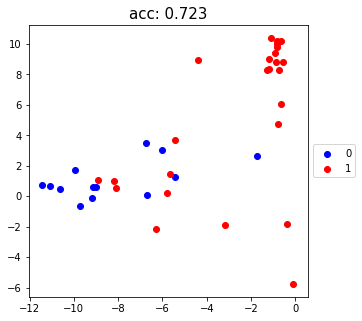

In [90]:
plot_embedding(label_test,res_regr)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from evaluator import Evaluator
import utilities

def plot_embedding(y_test,res_2d):
    

    eva = Evaluator(KNeighborsClassifier(n_neighbors = 1))
    acc,_,_,_ = eva.performance_with_kfold(res_2d,y_test)


    group = [ [] for x in range(2)]

    for i in range(len(y_test)):
        group[y_test[i]].append(res_2d[i])

    color_names = ["b", "r"]
    f = plt.figure(figsize=(5,5))
    plt.title("acc: %.3f" % np.mean(acc), fontsize=15)
    for i in range(2):
        xx = group[i]
        xx = np.array(xx)
        xx = xx[:,0]
        yy = group[i]
        yy = np.array(yy)
        yy = yy[:,1]

        plt.scatter(xx,yy, c=color_names[i], label=str(i))

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
